In [2]:
#Import Libraries
import json
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score
import matplotlib.pyplot as plt

In [3]:
# Read JSON file
with open('new_bus_json.json') as f:
    data = json.load(f)
    
# Extract relevant data by Converting JSON data to DataFrame
system_data = []
for key, value in data['sensorData']['jsonData'].items():
    value['id'] = key  # Add an identifier for each data point
    system_data.append(value)

# Convert to pandas DataFrame
df = pd.DataFrame(system_data)

# Summary statistics
df.describe()

,count,humidity,pressure,temperature,oxygenSensor
count,7048.000000,7048.000000,7048.000000,7048.000000,4084.000000
mean,17.159620,40.485480,98.336019,23.700681,20.819167
std,29.646112,5.780863,5.892388,1.862144,0.101321
min,0.000000,0.000000,0.000000,0.000000,20.620000
25%,2.000000,39.580000,98.280000,22.710000,20.760000
50%,4.000000,40.840000,98.490000,23.410000,20.790000
75%,9.000000,43.960000,99.060000,25.110000,20.840000
max,91.000000,134.570000,99.820000,26.860000,21.270000


In [4]:
#Preprocess and Clean Data
print("Column Data Types: ")
data_type = df.dtypes
data_type

Column Data Types: 


count             int64
humidity        float64
pressure        float64
temperature     float64
id               object
oxygenSensor    float64
dtype: object

In [5]:
null_value = df.isnull()
null_count = null_value.sum()
null_count

count              0
humidity           0
pressure           0
temperature        0
id                 0
oxygenSensor    2964
dtype: int64

In [6]:
total_null_count = null_count.sum()
total_null_count

2964

In [7]:
# Handle missing values
df.dropna(inplace=True)

In [8]:
# Check for missing values
print("Missing values:", df.isnull().sum())

Missing values: count           0
humidity        0
pressure        0
temperature     0
id              0
oxygenSensor    0
dtype: int64


In [9]:
# Split data into features (X) and target variable (y)
X = df[['humidity', 'pressure', 'count', 'oxygenSensor']]  # Feature matrix
y = df['temperature']  # Target variable

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train the Model Using Training Data
# Initialize and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Performance Evaluation Using Test Data
# Predict on the test set
y_pred = model.predict(X_test)
y_pred

array([23.0981114 , 23.1646194 , 23.03052765, 23.03523282, 22.57195245,
       25.51815095, 23.12937601, 23.18245044, 23.16562305, 22.98556759,
       25.64423173, 23.08505932, 23.11702044, 23.01638111, 23.03373808,
       23.13109515, 23.05095843, 23.21928132, 22.53205444, 22.52045127,
       22.9592475 , 22.62363444, 23.02319726, 22.85914507, 22.68962709,
       23.04400343, 25.55464533, 22.96821451, 22.98786945, 22.50817558,
       23.083208  , 23.04635471, 22.58471943, 23.08045448, 23.09651548,
       23.21600625, 23.10131574, 25.53271135, 23.052819  , 22.60004625,
       25.2919751 , 25.52457637, 23.02735264, 22.40864247, 22.40336798,
       23.08810129, 23.10080733, 23.08259841, 22.66363585, 22.63854931,
       22.47254034, 23.18947727, 23.27299606, 22.88782321, 23.05688138,
       23.10864613, 22.60479586, 22.59461411, 22.64201554, 23.17357838,
       23.08325187, 22.68578216, 23.09742638, 22.86778112, 22.44717378,
       23.04903555, 22.49081045, 23.13781262, 22.50239381, 22.52

In [13]:
num_values = len(y_pred)
print("Number of values in y_pred:", num_values)

Number of values in y_pred: 817


In [14]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.15810731634383443


In [15]:
# Display coefficients
print('Coefficients:', model.coef_)

Coefficients: [-0.11509301  0.28267356 -0.00496845  1.52974774]


In [16]:
r2_MLR = r2_score(y_pred, y_test)
r2_MLR

0.8216502918141302

In [17]:
df.head()

,count,humidity,pressure,temperature,id,oxygenSensor
2964,4,41.97,98.14,22.07,-NueoL1gkM2PqLlSs80d,20.72
2965,4,41.36,98.14,22.20,-NueoM0DI7IgmpG9immZ,20.70
2966,4,41.41,98.14,22.18,-NueoN0FbRmlmFW0JL_V,20.75
2967,4,41.28,98.15,22.22,-NueoNxjgSLPRouUY6fp,20.74
2968,4,41.19,98.14,22.18,-NueoOu2aHQkjTgyOZz9,20.74


In [18]:
df.tail()

,count,humidity,pressure,temperature,id,oxygenSensor
7043,5,40.85,99.6,23.71,-Nv0Q-pNPJzMrIadKZRk,20.74
7044,5,41.07,99.6,23.71,-Nv0Q0lnZwZPIqzpPIFF,20.73
7045,5,40.92,99.6,23.71,-Nv0Q1iIDUka3IzUUCQj,20.74
7046,5,41.16,99.6,23.71,-Nv0Q2etjcgE3ZR6QQ_q,20.73
7047,5,40.93,99.6,23.69,-Nv0Q3bNCRZfIwvKm_vP,20.75


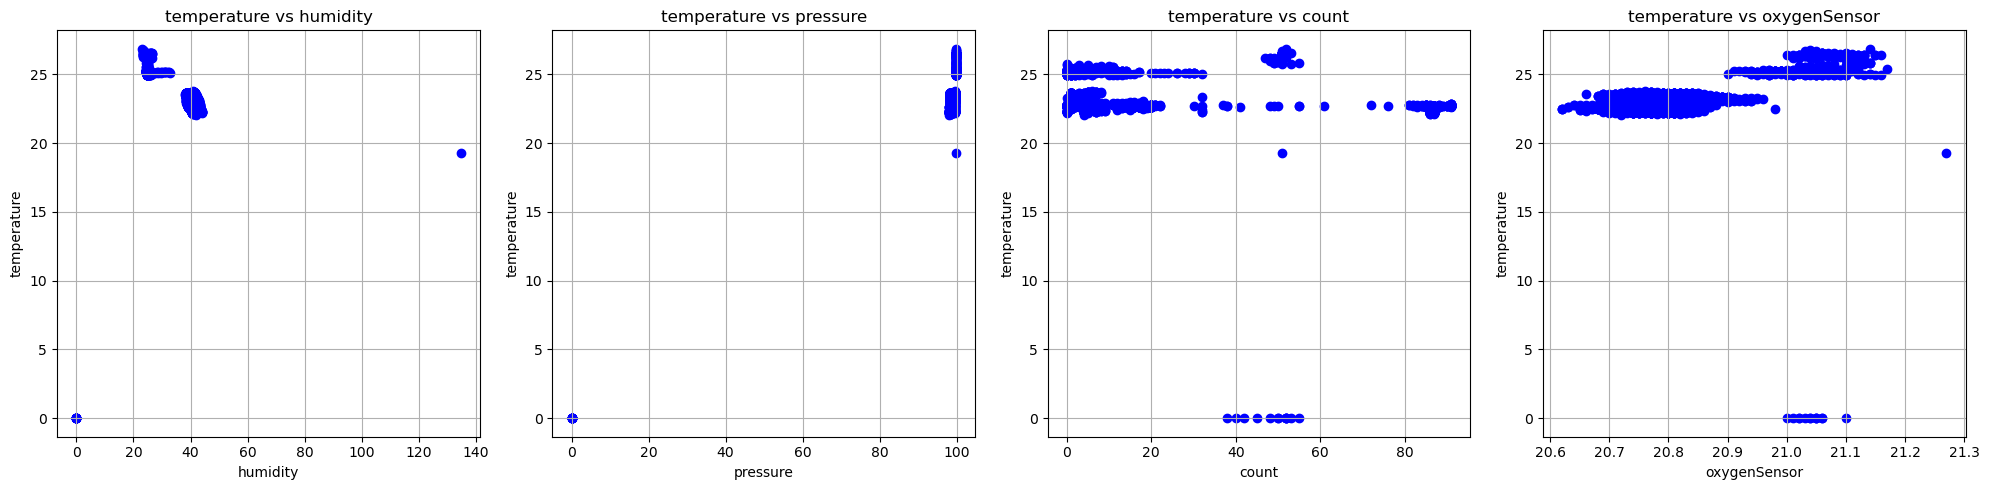

In [19]:
fig, axs = plt.subplots(1,4,figsize = (20,5))
for i, feature in enumerate(X_test):
    axs[i].scatter(df[feature], df['temperature'], color='blue')
    axs[i].set_title(f'temperature vs {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('temperature')
    axs[i].grid(True)
    
plt.tight_layout()
plt.show()

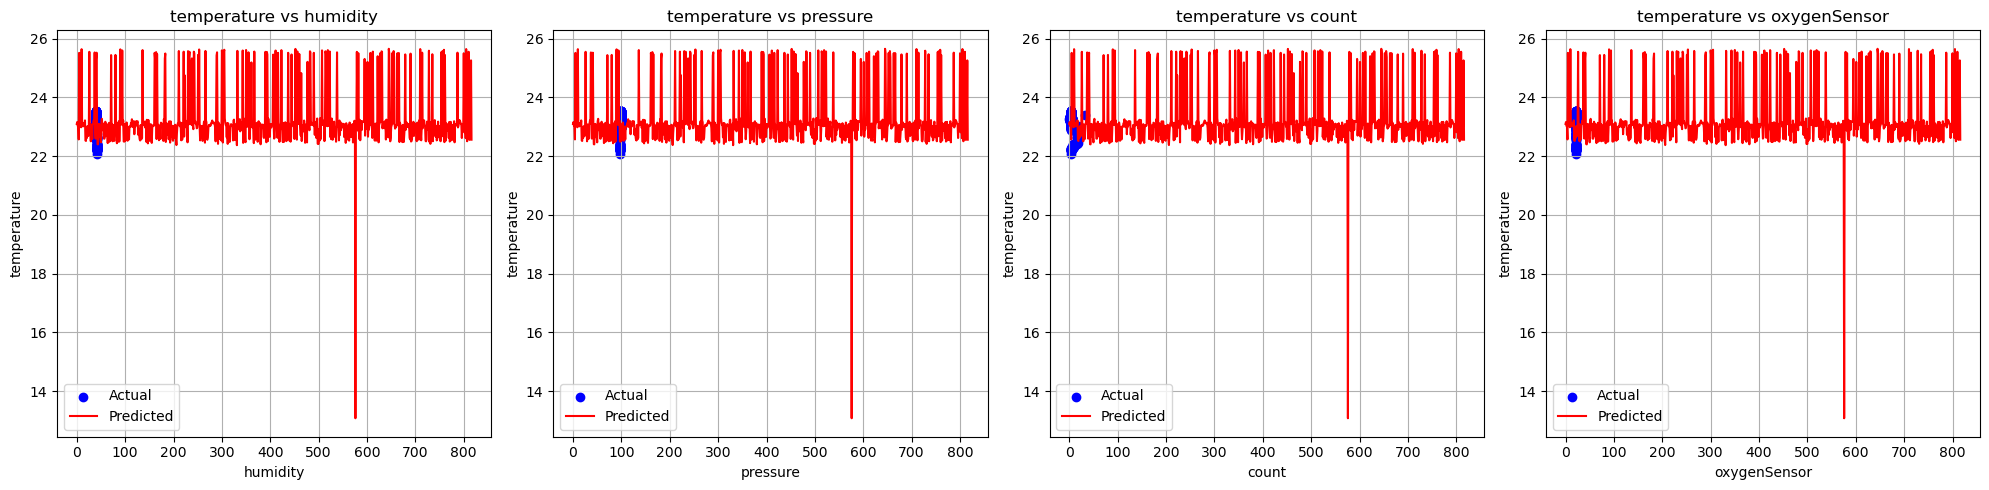

In [21]:
import matplotlib.pyplot as plt

# y_pred is the predicted values and df is DataFrame
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, feature in enumerate(X_test):
    #plots the values of the current feature (df[feature][:len(y_test)]) against
    #temperature values (df['temperature'][:len(y_pred)]).
    axs[i].scatter(df[feature][:len(y_test)], df['temperature'][:len(y_pred)], color='blue', label='Actual')
    axs[i].plot(y_pred, color='red', label='Predicted')  # Plotting the predicted values
    axs[i].set_title(f'temperature vs {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('temperature')
    axs[i].grid(True)
    axs[i].legend()  # Show legend

plt.tight_layout()
plt.show()
